In [128]:
import pandas as pd

In [129]:
import matplotlib.pyplot as plt
import numpy as np

In [130]:
# 모델대입하고 싶다면 cat_columns 확인 필수 자주 오류남
# 컬럼을 비교하고 싶은 곳까지 실행하면 됩니다. #도배되어있는 곳까지 하시면 됩니다.
train = pd.read_csv("data/train.csv" ,index_col="no",encoding='utf-8')
test = pd.read_csv("data/test.csv",index_col="no",encoding="utf-8")

In [131]:
#결측치 채우기
train=train.replace(" ?",np.nan)
#전처리 후 그래프 비교하기 위해 복사
train_copy=train.copy()

In [132]:
#결측치 채우기
test=test.replace(" ?",np.nan)

In [133]:
train.info() #결측치 workclass occupation native-country

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29305 entries, 1 to 29305
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29305 non-null  int64 
 1   workclass       27642 non-null  object
 2   fnlwgt          29305 non-null  int64 
 3   education       29305 non-null  object
 4   education-num   29305 non-null  int64 
 5   marital-status  29305 non-null  object
 6   occupation      27637 non-null  object
 7   relationship    29305 non-null  object
 8   race            29305 non-null  object
 9   sex             29305 non-null  object
 10  capital-gain    29305 non-null  int64 
 11  capital-loss    29305 non-null  int64 
 12  hours-per-week  29305 non-null  int64 
 13  native-country  28810 non-null  object
 14  income          29305 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.6+ MB


In [134]:
test.info() #결측치 workclass occupation native-country

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19537 entries, 29306 to 48842
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             19537 non-null  int64 
 1   workclass       18401 non-null  object
 2   fnlwgt          19537 non-null  int64 
 3   education       19537 non-null  object
 4   education-num   19537 non-null  int64 
 5   marital-status  19537 non-null  object
 6   occupation      18396 non-null  object
 7   relationship    19537 non-null  object
 8   race            19537 non-null  object
 9   sex             19537 non-null  object
 10  capital-gain    19537 non-null  int64 
 11  capital-loss    19537 non-null  int64 
 12  hours-per-week  19537 non-null  int64 
 13  native-country  19175 non-null  object
dtypes: int64(6), object(8)
memory usage: 2.2+ MB


In [135]:
train_copy["workclass"].value_counts()

 Private             20410
 Self-emp-not-inc     2305
 Local-gov            1868
 State-gov            1201
 Self-emp-inc          987
 Federal-gov           854
 Without-pay            12
 Never-worked            5
Name: workclass, dtype: int64

In [136]:
train_copy["native-country"].value_counts()

 United-States                 26301
 Mexico                          579
 Philippines                     178
 Germany                         124
 Puerto-Rico                     117
 Canada                          111
 El-Salvador                      96
 Cuba                             94
 India                            90
 England                          75
 South                            74
 Jamaica                          68
 China                            68
 Dominican-Republic               61
 Italy                            60
 Japan                            54
 Poland                           53
 Columbia                         53
 Haiti                            51
 Guatemala                        51
 Vietnam                          50
 Portugal                         43
 Taiwan                           39
 Iran                             38
 Nicaragua                        28
 Greece                           25
 Peru                             25
 

In [137]:
#그래프를 보고 전처리 비교할 때 여기까지 실행하고 전처리가 필요한 부분만 
#그래프 아래에 해당하는 컬럼의 전처리를 복사하여 전처리를 바꾸면서 진행
#그래프를 비교할 때는 원핫 인코딩을 하시면 안됩니다.
#결측치 채우기
# workclass(개별값) -> other native-country(최빈값)->United-States occupation(개별값)->ect
train["workclass"]=train["workclass"].replace(np.nan,"other")
train["native-country"]=train["native-country"].replace(np.nan," United-States")
train["occupation"]=train["occupation"].replace(np.nan,"ect")
train_copy["workclass"]=train["workclass"].replace(np.nan,"other")
train_copy["native-country"]=train["native-country"].replace(np.nan," United-States")
train_copy["occupation"]=train["occupation"].replace(np.nan,"ect")
test["workclass"]=test["workclass"].replace(np.nan,"other")
test["native-country"]=test["native-country"].replace(np.nan," United-States")
test["occupation"]=test["occupation"].replace(np.nan,"ect")

In [138]:
train_copy["occupation"].value_counts()

 Prof-specialty       3724
 Craft-repair         3632
 Exec-managerial      3609
 Adm-clerical         3440
 Sales                3292
 Other-service        2975
 Machine-op-inspct    1811
ect                   1668
 Transport-moving     1393
 Handlers-cleaners    1249
 Farming-fishing       888
 Tech-support          865
 Protective-serv       603
 Priv-house-serv       146
 Armed-Forces           10
Name: occupation, dtype: int64

In [139]:
# #####################cat_columns 반드시 다시 수정할 것 # #####################
#컬럼삭제
del train["native-country"]
del train["fnlwgt"]
del train["race"]
del test["native-country"]
del test["fnlwgt"]
del test["race"]

In [140]:
#성별 남자->0 여자->1 라벨 인코딩
train['sex'] = train['sex'].map({" Male":0, " Female":1})
test['sex'] = test['sex'].map({" Male":0, " Female":1})

In [141]:
#전처리의 주석처리의 경우 사용하지 않음
#최종학력 전처리
#pre ,5th-6th  ,7th-8th ,9th, 10th ,11th, 12th -> pre-12th 통합
#Assoc-voc,  Assoc-acdm ->  Assoc 통합
#비슷한 통계 수치를 통합시킴
train["education"].replace([' 11th', ' Some-college', ' Bachelors', ' Assoc-voc', ' 9th',
       ' HS-grad', ' Masters', ' 5th-6th', ' Prof-school', ' 12th',
       ' 10th', ' Assoc-acdm', ' Doctorate', ' 7th-8th', ' 1st-4th',
       ' Preschool'],
                           [' pre-12th', ' Some-college', ' Bachelors', ' Assoc', ' pre-12th',
       ' HS-grad', ' Masters', ' pre-12th', ' Prof-Doct', ' pre-12th',
       ' pre-12th', ' Assoc', ' Prof-Doct', ' pre-12th', ' pre-12th',
       ' pre-12th'],inplace=True)
test["education"].replace([' 11th', ' Some-college', ' Bachelors', ' Assoc-voc', ' 9th',
       ' HS-grad', ' Masters', ' 5th-6th', ' Prof-school', ' 12th',
       ' 10th', ' Assoc-acdm', ' Doctorate', ' 7th-8th', ' 1st-4th',
       ' Preschool'],
                           [' pre-12th', ' Some-college', ' Bachelors', ' Assoc', ' pre-12th',
       ' HS-grad', ' Masters', ' pre-12th', ' Prof-Doct', ' pre-12th',
       ' pre-12th', ' Assoc', ' Prof-Doct', ' pre-12th', ' pre-12th',
       ' pre-12th'],inplace=True)

# #최종학력 전처리 필요시 ctrl+/로 주석 제거 후 사용
# train["education"].replace([' 11th', ' Some-college', ' Bachelors', ' Assoc-voc', ' 9th',
#        ' HS-grad', ' Masters', ' 5th-6th', ' Prof-school', ' 12th',
#        ' 10th', ' Assoc-acdm', ' Doctorate', ' 7th-8th', ' 1st-4th',
#        ' Preschool'],
#                            [' pre-12th', ' Some-college_HS-grad', ' Bachelors', ' Assoc', ' pre-12th',
#        ' Some-college_HS-grad',  ' Prof-Doct_Masters', ' pre-12th', ' Prof-Doct_Masters', ' pre-12th',
#        ' pre-12th', ' Assoc', ' Prof-Doct_Masters', ' pre-12th', ' pre-12th',
#        ' pre-12th'],inplace=True)
# test["education"].replace([' 11th', ' Some-college', ' Bachelors', ' Assoc-voc', ' 9th',
#        ' HS-grad', ' Masters', ' 5th-6th', ' Prof-school', ' 12th',
#        ' 10th', ' Assoc-acdm', ' Doctorate', ' 7th-8th', ' 1st-4th',
#        ' Preschool'],
#                           [' pre-12th', ' Some-college_HS-grad', ' Bachelors', ' Assoc', ' pre-12th',
#        ' Some-college_HS-grad',  ' Prof-Doct_Masters', ' pre-12th', ' Prof-Doct_Masters', ' pre-12th',
#        ' pre-12th', ' Assoc', ' Prof-Doct_Masters', ' pre-12th', ' pre-12th',
#        ' pre-12th'],inplace=True)

In [142]:
# #인종 전처리 필요시 ctrl+/로 주석 제거 후 사용
# #인종 전처리
# # Black , Amer-Indian-Eskimo , Other -> Other 통합
# train["race"].replace([' White', ' Asian-Pac-Islander', ' Black', ' Amer-Indian-Eskimo',
#        ' Other'],[' White', ' Asian-Pac-Islander', ' Other', ' Other',
#        ' Other'],inplace=True)
# test["race"].replace([' White', ' Asian-Pac-Islander', ' Black', ' Amer-Indian-Eskimo',
#        ' Other'],[' White', ' Asian-Pac-Islander', ' Other', ' Other',
#        ' Other'],inplace=True)

In [143]:
# #국적 전처리 필요시 ctrl+/로 주석 제거 후 사용
# #other 미국을 제외한 수입이 낮은 국가들
# #other_high 미국을 제외한 수입이 높은 국가들
# train["native-country"].replace([' United-States', ' Haiti', ' Mexico', ' Puerto-Rico',
#        ' Philippines',' Germany', ' Peru', ' Ecuador',
#        ' Iran', ' Thailand', ' Dominican-Republic', ' Poland',
#        ' Scotland', ' Italy', ' Jamaica', ' China', ' Portugal',
#        ' Columbia', ' Hungary', ' Vietnam', ' Taiwan', ' Canada', ' Hong',
#        ' Guatemala', ' El-Salvador', ' England',
#        ' Outlying-US(Guam-USVI-etc)', ' India', ' France', ' Cuba',
#        ' Greece', ' Trinadad&Tobago', ' South', ' Japan', ' Yugoslavia',
#        ' Nicaragua', ' Ireland', ' Cambodia', ' Laos', ' Honduras',
#        ' Holand-Netherlands'],[' United-States', 'other', 'other', 'other',
#        'other', 'other_high', 'other', 'other',
#        'other_high', 'other', 'other', 'other',
#        'other', 'other_high', 'other', 'other', 'other',
#        'other', 'other_high', 'other', 'other_high', 'other_high', 'other',
#        'other', 'other', 'other_high',
#        'other', 'other_high', 'other', 'other',
#        'other_high', 'other', 'other', 'other_high', 'other',
#        'other', 'other_high', 'other', 'other', 'other',
#        'other'],inplace=True)
# test["native-country"].replace([' United-States', ' Haiti', ' Mexico', ' Puerto-Rico',
#        ' Philippines',' Germany', ' Peru', ' Ecuador',
#        ' Iran', ' Thailand', ' Dominican-Republic', ' Poland',
#        ' Scotland', ' Italy', ' Jamaica', ' China', ' Portugal',
#        ' Columbia', ' Hungary', ' Vietnam', ' Taiwan', ' Canada', ' Hong',
#        ' Guatemala', ' El-Salvador', ' England',
#        ' Outlying-US(Guam-USVI-etc)', ' India', ' France', ' Cuba',
#        ' Greece', ' Trinadad&Tobago', ' South', ' Japan', ' Yugoslavia',
#        ' Nicaragua', ' Ireland', ' Cambodia', ' Laos', ' Honduras',
#        ' Holand-Netherlands'],[' United-States', 'other', 'other', 'other',
#        'other', 'other_high', 'other', 'other',
#        'other_high', 'other', 'other', 'other',
#        'other', 'other_high', 'other', 'other', 'other',
#        'other', 'other_high', 'other', 'other_high', 'other_high', 'other',
#        'other', 'other', 'other_high',
#        'other', 'other_high', 'other', 'other',
#        'other_high', 'other', 'other', 'other_high', 'other',
#        'other', 'other_high', 'other', 'other', 'other',
#        'other'],inplace=True)

In [144]:
#수입형태 전처리
#Self-emp-inc,Federal-gov -> other_high
#Self-emp-not-inc , Local-gov , State-gov ->other_mid
#other,Without-pay,other_low -> other_low 
train["workclass"].replace([' Private', ' Self-emp-not-inc', ' Local-gov', 'other',
       ' State-gov', ' Self-emp-inc', ' Federal-gov', ' Without-pay',
       ' Never-worked'],[' Private', 'other_mid', 'other_mid', 'other_low',
       'other_mid', 'other_high', 'other_high', 'other_low',
       'other_low'],inplace=True)
test["workclass"].replace([' Private', ' Self-emp-not-inc', ' Local-gov', 'other',
       ' State-gov', ' Self-emp-inc', ' Federal-gov', ' Without-pay',
       ' Never-worked'],[' Private', 'other_mid', 'other_mid', 'other_low',
       'other_mid', 'other_high', 'other_high', 'other_low',
       'other_low'],inplace=True)

In [145]:
#배우자상태 전처리 
#Married-civ-spouse,Married-AF-spouse-> 1 Married-civ-spouse아니면 0  라벨인코딩
train["marital-status"].replace([' Divorced', ' Never-married', ' Married-civ-spouse', ' Separated',
       ' Married-spouse-absent', ' Widowed', ' Married-AF-spouse'],[0, 0, 1, 0,
       0, 0, 1],inplace=True)
test["marital-status"].replace([' Divorced', ' Never-married', ' Married-civ-spouse', ' Separated',
       ' Married-spouse-absent', ' Widowed', ' Married-AF-spouse'],[0, 0, 1, 0,
       0, 0, 1],inplace=True)
train["Married-civ-spouse"]=train["marital-status"]#새로운 컬럼 생성
test["Married-civ-spouse"]=test["marital-status"]
del train["marital-status"] #기존 컬럼 삭제
del test["marital-status"]

In [146]:
#관계 전처리-> 
# Husband-Wife-> 1 Husband-Wife아니면 0
#라벨인코딩
train["relationship"].replace([' Not-in-family', ' Husband', ' Unmarried', ' Other-relative',
       ' Own-child', ' Wife'],[0, 1, 0,0,0,1],inplace=True)
test["relationship"].replace([' Not-in-family', ' Husband', ' Unmarried', ' Other-relative',
       ' Own-child', ' Wife'],[0, 1, 0,0,0,1],inplace=True)
train["Husband-Wife"]=train["relationship"]#새로운 컬럼 생성
test["Husband-Wife"]=test["relationship"]
del train["relationship"]#기존 컬럼 삭제
del test["relationship"]

In [147]:
#직업전처리
#Other-service,Handlers-cleaners,Farming-fishing,Adm-clerical->Other-service
#Machine-op-inspct,ect,Armed-Forces ->ect
train["occupation"].replace([' Machine-op-inspct', ' Other-service', ' Handlers-cleaners',
       ' Tech-support', ' Transport-moving', ' Farming-fishing',
       ' Prof-specialty', ' Priv-house-serv', ' Adm-clerical',
       ' Protective-serv', ' Exec-managerial', 'ect', ' Craft-repair',
       ' Sales', ' Armed-Forces'],['ect', ' Other-service', ' Other-service',
       ' Tech-support', ' Transport-moving', ' Other-service',
       ' Prof-specialty', ' Priv-house-serv', 'ect',
       ' Protective-serv', ' Exec-managerial', 'ect', ' Craft-repair',
       ' Sales', 'ect'],inplace=True)
test["occupation"].replace([' Machine-op-inspct', ' Other-service', ' Handlers-cleaners',
       ' Tech-support', ' Transport-moving', ' Farming-fishing',
       ' Prof-specialty', ' Priv-house-serv', ' Adm-clerical',
       ' Protective-serv', ' Exec-managerial', 'ect', ' Craft-repair',
       ' Sales', ' Armed-Forces'],['ect', ' Other-service', ' Other-service',
       ' Tech-support', ' Transport-moving', ' Other-service',
       ' Prof-specialty', ' Priv-house-serv', 'ect',
       ' Protective-serv', ' Exec-managerial', 'ect', ' Craft-repair',
       ' Sales', 'ect'],inplace=True)
# #직업전처리
# train["occupation"].replace([' Machine-op-inspct', ' Other-service', ' Handlers-cleaners',
#        ' Tech-support', ' Transport-moving', ' Farming-fishing',
#        ' Prof-specialty', ' Priv-house-serv', ' Adm-clerical',
#        ' Protective-serv', ' Exec-managerial', 'ect', ' Craft-repair',
#        ' Sales', ' Armed-Forces'],['group2', 'group1', 'group1',
#        'group5', 'group6', 'group2',
#        'group3', 'group4', 'group2',
#        'group5', 'group3', 'group2', ' Craft-repair',
#        'group6', 'group4'],inplace=True)
# test["occupation"].replace([' Machine-op-inspct', ' Other-service', ' Handlers-cleaners',
#        ' Tech-support', ' Transport-moving', ' Farming-fishing',
#        ' Prof-specialty', ' Priv-house-serv', ' Adm-clerical',
#        ' Protective-serv', ' Exec-managerial', 'ect', ' Craft-repair',
#        ' Sales', ' Armed-Forces'],['group2', 'group1', 'group1',
#        'group5', 'group6', 'group2',
#        'group3', 'group4', 'group2',
#        'group5', 'group3', 'group2', ' Craft-repair',
#        'group6', 'group4'],inplace=True)
# #직업전처리
# train["occupation"].replace([' Machine-op-inspct', ' Other-service', ' Handlers-cleaners',
#        ' Tech-support', ' Transport-moving', ' Farming-fishing',
#        ' Prof-specialty', ' Priv-house-serv', ' Adm-clerical',
#        ' Protective-serv', ' Exec-managerial', 'ect', ' Craft-repair',
#        ' Sales', ' Armed-Forces'],[' Other-service', ' Other-service', ' Other-service',
#        ' Tech-support_Transport-moving_Craft-repair_Sales',
#        ' Tech-support_Transport-moving_Craft-repair_Sales', ' Other-service',
#        ' Exec-managerial_Prof-specialty_Protective-serv', ' Other-service', ' Other-service',
#        ' Exec-managerial_Prof-specialty_Protective-serv', ' Exec-managerial_Prof-specialty_Protective-serv', ' Other-service',
#        ' Tech-support_Transport-moving_Craft-repair_Sales',
#        ' Tech-support_Transport-moving_Craft-repair_Sales', ' Other-service'],inplace=True)
# test["occupation"].replace([' Machine-op-inspct', ' Other-service', ' Handlers-cleaners',
#        ' Tech-support', ' Transport-moving', ' Farming-fishing',
#        ' Prof-specialty', ' Priv-house-serv', ' Adm-clerical',
#        ' Protective-serv', ' Exec-managerial', 'ect', ' Craft-repair',
#        ' Sales', ' Armed-Forces'],[' Other-service', ' Other-service', ' Other-service',
#        ' Tech-support_Transport-moving_Craft-repair_Sales',
#        ' Tech-support_Transport-moving_Craft-repair_Sales', ' Other-service',
#        ' Exec-managerial_Prof-specialty_Protective-serv', ' Other-service', ' Other-service',
#        ' Exec-managerial_Prof-specialty_Protective-serv', ' Exec-managerial_Prof-specialty_Protective-serv', ' Other-service',
#        ' Tech-support_Transport-moving_Craft-repair_Sales',
#        ' Tech-support_Transport-moving_Craft-repair_Sales', ' Other-service'],inplace=True)

In [148]:
#주간 노동시간 전처리(5시간 단위별로 잘라서 확인 1
train["hours-per-week"]=train["hours-per-week"]//5 # 5시간 별로 확인
train["hours-per-week"][train["hours-per-week"]<=7]=1 # 주당 근로시간 0~39시간
train["hours-per-week"][train["hours-per-week"]==8]=2 # 주당 근로시간 40~44시간
train["hours-per-week"][train["hours-per-week"]>=9]=3 #  주당 근로시간 45~max시간
train["hours-per-week"]=train["hours-per-week"].replace([1,2,3],["min_35","36_40","41_max"])
test["hours-per-week"]=test["hours-per-week"]//5
test["hours-per-week"][test["hours-per-week"]<=7]=1
test["hours-per-week"][test["hours-per-week"]==8]=2
test["hours-per-week"][test["hours-per-week"]>=9]=3
test["hours-per-week"]=test["hours-per-week"].replace([1,2,3],["min_35","36_40","41_max"])


<ipython-input-148-f262f54e04cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["hours-per-week"][train["hours-per-week"]<=7]=1 # 주당 근로시간 0~39시간
<ipython-input-148-f262f54e04cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["hours-per-week"][train["hours-per-week"]==8]=2 # 주당 근로시간 40~44시간
<ipython-input-148-f262f54e04cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["hours-per-week"][train["hours-per-week"]>=9

In [149]:
#투자 전처리--> gain과 loss의 차 = total
train["capital-total"]=train["capital-gain"]-train["capital-loss"]
train.drop("capital-gain",axis=1,inplace=True)#기존 컬럼삭제
train.drop("capital-loss",axis=1,inplace=True)#기존 컬럼삭제
# train["capital-total"]=train["capital-total"]//1000
# train["capital-ox"]=0 # 투자하지 않는 사람
# train["capital-ox"][train["capital-total"]<0]=1  # 투자 손해
# train["capital-ox"][train["capital-total"]>6]=2 # 투자_이익중 6천초과 번 사람
# train["capital-ox"][(train["capital-total"]>0) & (train["capital-total"]<=6)]=0 # 투자_이익중 6천이하 번 사람
# train["capital-ox"].replace([0,1,2,3],["capital_x","capital_loss","capital_gain_2","capital_gain_1"],inplace=True)
# train.drop("capital-total",axis=1,inplace=True)
test["capital-total"]=test["capital-gain"]-test["capital-loss"]
test.drop("capital-gain",axis=1,inplace=True)
test.drop("capital-loss",axis=1,inplace=True)
#test["capital-total"]=test["capital-total"]//1000
# test["capital-ox"]=0
# test["capital-ox"][test["capital-total"]<0]=1
# test["capital-ox"][test["capital-total"]>6]=2
# test["capital-ox"][(test["capital-total"]>0) & (test["capital-total"]<=6)]=0
# test["capital-ox"].replace([0,1,2,3],["capital_x","capital_loss","capital_gain_2","capital_gain_1"],inplace=True)
# test.drop("capital-total",axis=1,inplace=True)



In [150]:
# # 학력학년 전처리
# train["education-num"][train["education-num"]<=8]=1 # 8학년 이하 -> 1_8
# train["education-num"][(train["education-num"]>8) & (train["education-num"]<=12)]=2 # 9~12학년 -> 9_12
# train["education-num"][train["education-num"]>12]=3 # 13학년 이상 ->13_18
# train["education-num"].replace([1,2,3],["1_8","9_12","13_18"],inplace=True)
# test["education-num"][test["education-num"]<=8]=1
# test["education-num"][(test["education-num"]>8) & (test["education-num"]<=12)]=2
# test["education-num"][test["education-num"]>12]=3
# test["education-num"].replace([1,2,3],["1_8","9_12","13_18"],inplace=True)

In [151]:
#파이널 웨이트 전처리
train["fnlwgt"]=np.log(train["fnlwgt"]) #왜도->높음로그 변환 
train["fnlwgt"]=train["fnlwgt"]/1 # 1로 나눔
train["fnlwgt"]=train["fnlwgt"].round(0) # 반올림
test["fnlwgt"]=np.log(test["fnlwgt"])
test["fnlwgt"]=test["fnlwgt"]/1
test["fnlwgt"]=test["fnlwgt"].round(0)

In [152]:
#나이 전처리
train["age"]=train["age"]//5 # 5살 단위로 나눔
train["age"][train["age"]<=5]=5 #29세이하 -> min_29 
train["age"][(train["age"]>=7) &(train["age"]<=8) ]=7 #35~44세 -> 35_44
train["age"][(train["age"]>=9) &(train["age"]<=11) ]=9 #45_59세 ->45_59
train["age"][train["age"]>=12]=12 #30_34  30~34이상 과 60세 이상 ->30_34&60_max
train["age"][train["age"]==6]=12 #60_max  30~34이상 과 60세 이상 ->30_34&60_max
train["age"].replace([ 5,  7,  9 ,12],["min_29","35_44","45_59","30_34&60_max"],inplace=True)
test["age"]=test["age"]//5
test["age"][test["age"]<=5]=5
test["age"][(test["age"]>=7) &(test["age"]<=8) ]=7
test["age"][(test["age"]>=9) &(test["age"]<=11) ]=9
test["age"][test["age"]>=12]=12
test["age"][test["age"]==6]=12
test["age"].replace([5,7,9,12],["min_29","35_44","45_59","30_34&60_max"],inplace=True)                                 

<ipython-input-152-0a9cf8c8c78b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["age"][train["age"]<=5]=5 #29세이하 -> min_29
<ipython-input-152-0a9cf8c8c78b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["age"][(train["age"]>=7) &(train["age"]<=8) ]=7 #35~44세 -> 35_44
<ipython-input-152-0a9cf8c8c78b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["age"][(train["age"]>=9) &(train["age"]<=11) ]=9 #45_59세 ->45_59
<i

In [153]:
#학력 학년 컬럼 삭제 
# del train['education-num']
# del test['education-num']

In [155]:
#####################################카테고리 변경될 경우 수정해야 원핫인코딩 진행#######################################
#원핫인코딩을 진행할 카테고리 데이터
cat_feature = ['workclass','education','occupation',"hours-per-week","age"]

In [156]:
# 카테고리를 원핫 인코딩으로 이용하여 컬럼 생성
for col_name in cat_feature :
    dummy = pd.get_dummies(train[col_name],prefix = col_name)
    train = pd.concat([train,dummy],axis=1)
    train.drop(col_name,axis=1,inplace=True)

In [157]:
train

,education-num,sex,income,Married-civ-spouse,Husband-Wife,capital-total,workclass_ Private,workclass_other_high,workclass_other_low,workclass_other_mid,education_ Assoc,education_ Bachelors,education_ HS-grad,education_ Masters,education_ Prof-Doct,education_ Some-college,education_ pre-12th,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_ect,hours-per-week_36_40,hours-per-week_41_max,hours-per-week_min_35,age_30_34&60_max,age_35_44,age_45_59,age_min_29
no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
2,10,1,0,0,0,-1721,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,13,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,11,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
5,10,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,9,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
29302,9,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
29303,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [158]:
for col_name in cat_feature :
    dummy = pd.get_dummies(test[col_name],prefix = col_name)
    test = pd.concat([test,dummy],axis=1)
    test.drop(col_name,axis=1,inplace=True)

In [159]:
test

,education-num,sex,Married-civ-spouse,Husband-Wife,capital-total,workclass_ Private,workclass_other_high,workclass_other_low,workclass_other_mid,education_ Assoc,education_ Bachelors,education_ HS-grad,education_ Masters,education_ Prof-Doct,education_ Some-college,education_ pre-12th,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_ect,hours-per-week_36_40,hours-per-week_41_max,hours-per-week_min_35,age_30_34&60_max,age_35_44,age_45_59,age_min_29
no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
29306,10,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
29307,9,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
29308,13,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
29309,13,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
29310,16,1,1,1,-1902,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,9,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
48839,9,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
48840,10,0,1,1,4386,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0


In [160]:
#컬럼 차이가 income만 있는지 확인
set(train.columns)-set(test.columns)

{'income'}

In [161]:
# income 컬럼 맨뒤로 바꾸기
temp=train["income"]

del train["income"]

train["income"] =temp

In [162]:
#income 맨 뒤로 갔는지 확인(x,y의 값을 분리를 위해)
train.columns

Index(['education-num', 'sex', 'Married-civ-spouse', 'Husband-Wife',
       'capital-total', 'workclass_ Private', 'workclass_other_high',
       'workclass_other_low', 'workclass_other_mid', 'education_ Assoc',
       'education_ Bachelors', 'education_ HS-grad', 'education_ Masters',
       'education_ Prof-Doct', 'education_ Some-college',
       'education_ pre-12th', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Other-service',
       'occupation_ Priv-house-serv', 'occupation_ Prof-specialty',
       'occupation_ Protective-serv', 'occupation_ Sales',
       'occupation_ Tech-support', 'occupation_ Transport-moving',
       'occupation_ect', 'hours-per-week_36_40', 'hours-per-week_41_max',
       'hours-per-week_min_35', 'age_30_34&60_max', 'age_35_44', 'age_45_59',
       'age_min_29', 'income'],
      dtype='object')

In [163]:
train

,education-num,sex,Married-civ-spouse,Husband-Wife,capital-total,workclass_ Private,workclass_other_high,workclass_other_low,workclass_other_mid,education_ Assoc,education_ Bachelors,education_ HS-grad,education_ Masters,education_ Prof-Doct,education_ Some-college,education_ pre-12th,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_ect,hours-per-week_36_40,hours-per-week_41_max,hours-per-week_min_35,age_30_34&60_max,age_35_44,age_45_59,age_min_29,income
no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
2,10,1,0,0,-1721,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,13,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,11,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
5,10,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,9,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
29302,9,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
29303,6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [164]:
# 사용하고 싶으시면 주석을 푸시고 진행하시면 됩니다.
# del train["occupation_ Priv-house-serv"]
# del train["education-num_1_8"]
# del test["occupation_ Priv-house-serv"]
# del test["education-num_1_8"]

In [165]:
#x,y분리
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]

In [166]:
# test대입
X_test=test

- train과 test 컬럼 수가 맞는지 확인

In [167]:
set(X_train.columns)-set(X_test.columns)

set()

In [168]:
set(X_test.columns)-set(X_train.columns)

set()

In [169]:
# 혹시 컬럼이 다를 수 있기 때문에 test와 train의 컬럼을 맞춘다.
X_test.columns=X_train.columns


In [170]:
######################################################################################################
#####################################여기까지 실행####################################################
######################################################################################################
#???로 도배되어 있는 곳으로 점프??????????????????????????????

# 그래프 비교 확인

- total을 반드시 실행해주고 확인해야함

In [95]:
# - 필 수  필 수 필 수 필 수 필 수 -
total = float(len(train_copy)) 

In [96]:
import seaborn as sns

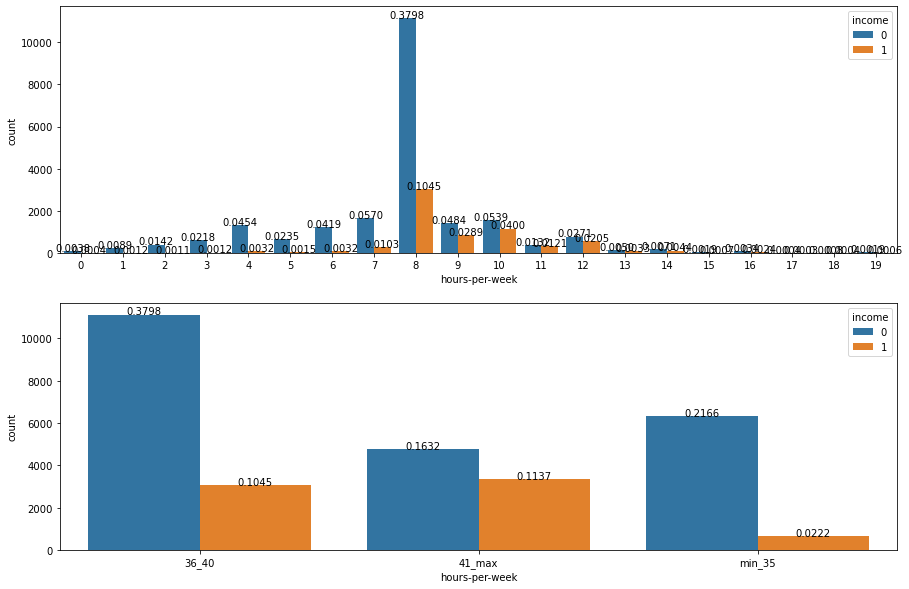

In [98]:
#주당근로시간 그래프 (전처리 전후)
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
train_copy["hours-per-week"]=train_copy["hours-per-week"]//5
#막대그래프의 위에 백분율 표시
ax=sns.countplot(data=train_copy,x="hours-per-week",hue="income")
for p in ax.patches:
    height = p.get_height() #그래프의 높이
    ax.text(p.get_x()+p.get_width()/2., # 글자의 x좌표
            height + 3, # 글자의 y좌표
            '{:1.4f}'.format(height/total), # 백분율
            ha="center") 
plt.subplot(2,1,2)
total = float(len(train)) 
ax=sns.countplot(data=train,x="hours-per-week",hue="income")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.4f}'.format(height/total),
            ha="center") 

In [99]:
#5살씩 끊어 보기
train_copy["age"]=train_copy["age"]//5 # 한번만 실행하도록한다

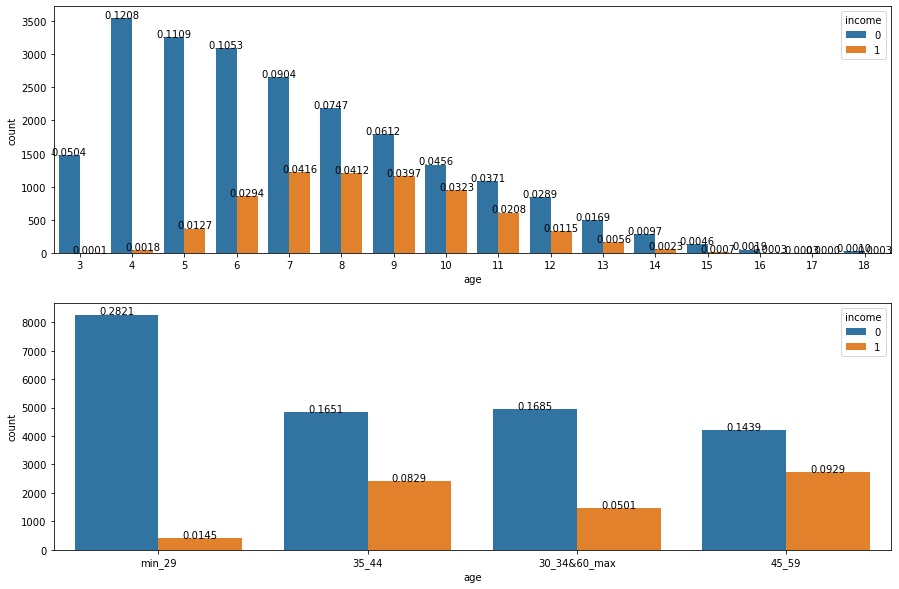

In [100]:
#나이 그래프(전처리 전후)
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
ax=sns.countplot(data=train_copy,x="age",hue="income")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.4f}'.format(height/total),
            ha="center") 
plt.subplot(2,1,2)
total = float(len(train)) 
ax=sns.countplot(data=train,x="age",hue="income")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.4f}'.format(height/total),
            ha="center") 

posx and posy should be finite values
posx and posy should be finite values


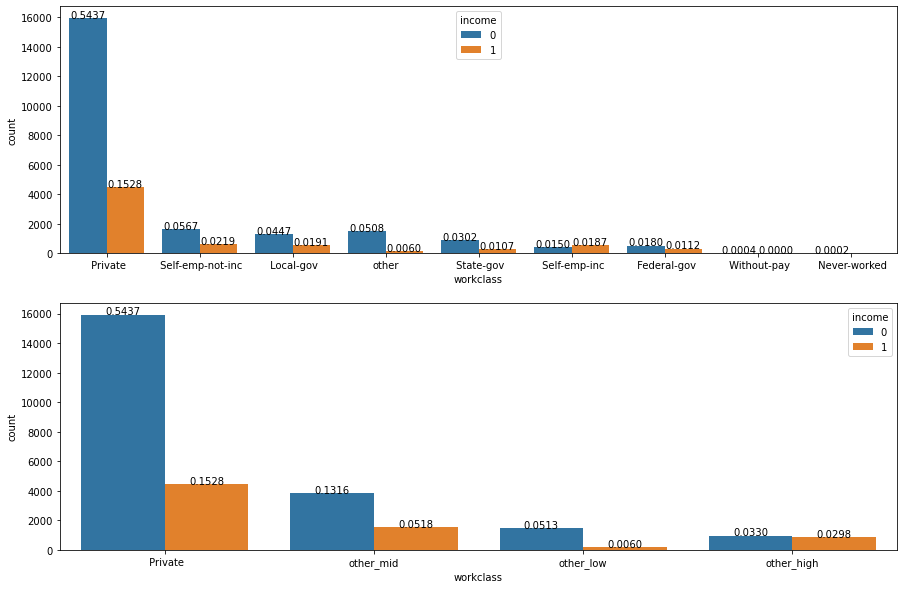

In [101]:
#workclass의 전처리 전후 그래프
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
ax=sns.countplot(data=train_copy,x="workclass",hue="income")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.4f}'.format(height/total),
            ha="center") 
plt.subplot(2,1,2)
ax=sns.countplot(data=train,x="workclass",hue="income")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.4f}'.format(height/total),
            ha="center") 

C:\Users\vdi02\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vdi02\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


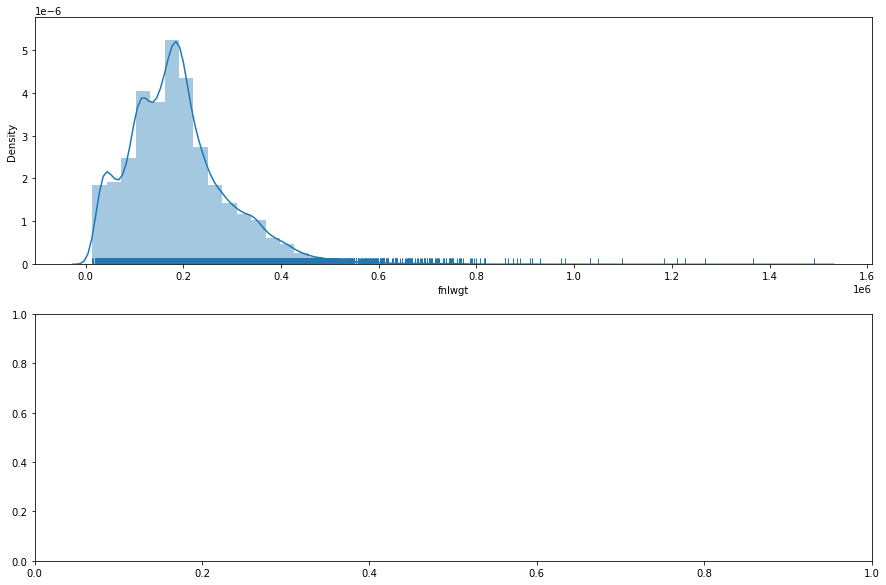

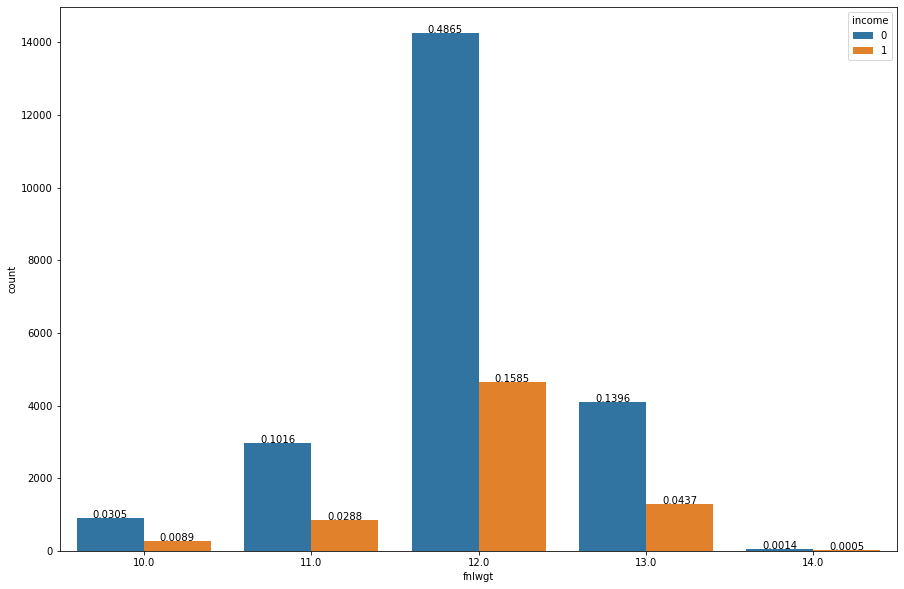

In [113]:
#finalweight 전처리 전후 그래프
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.distplot(train_copy["fnlwgt"] ,rug=True, hist=True, kde=True)
plt.subplot(2,1,2)
plt.figure(figsize=(15,10))
ax=sns.countplot(data=train,x="fnlwgt",hue="income")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.4f}'.format(height/total),
            ha="center") 

posx and posy should be finite values
posx and posy should be finite values


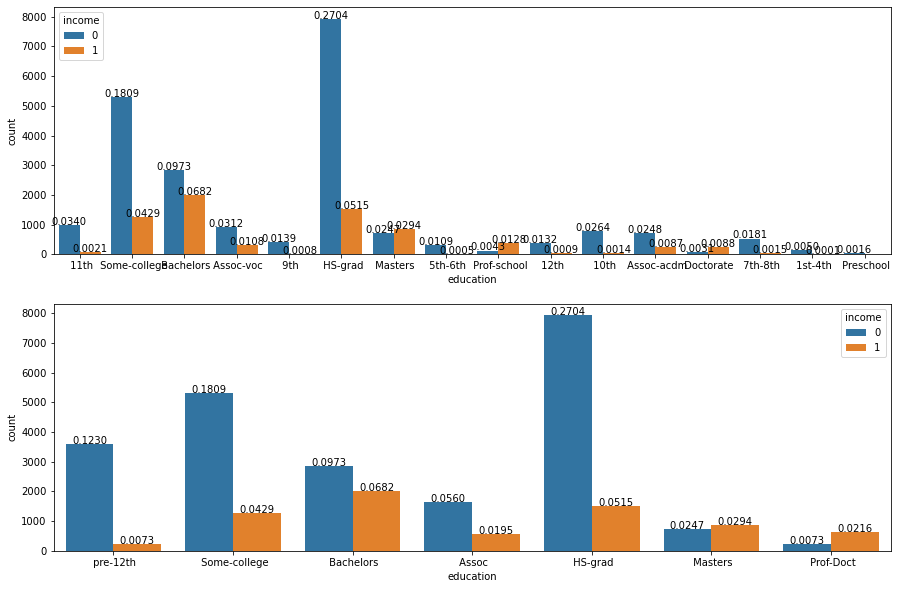

In [103]:
#학력 그래프(전처리 전후)
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
ax=sns.countplot(data=train_copy,x="education",hue="income")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.4f}'.format(height/total),
            ha="center") 
plt.subplot(2,1,2)
ax=sns.countplot(data=train,x="education",hue="income")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.4f}'.format(height/total),
            ha="center") 

posx and posy should be finite values
posx and posy should be finite values


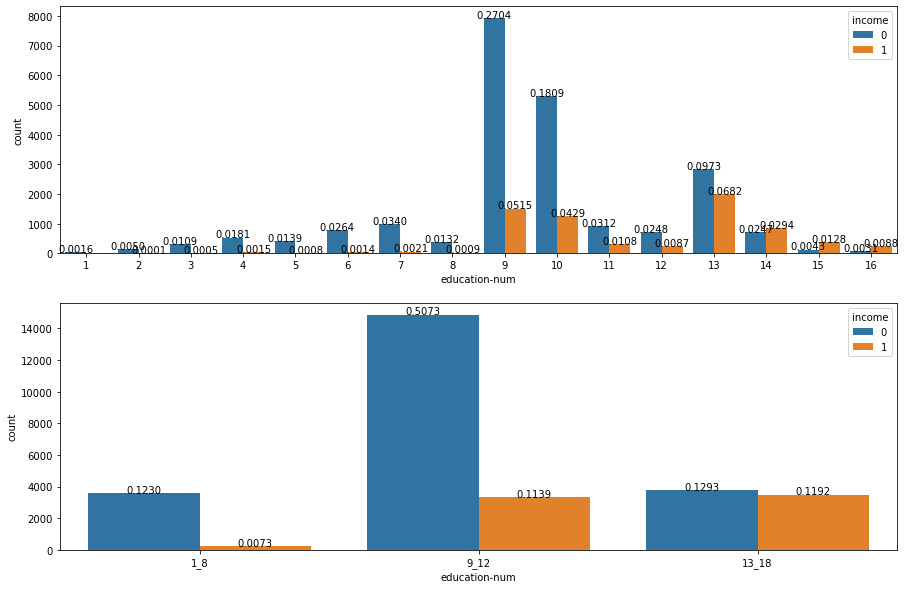

In [104]:
#학력 학년 그래프(전처리 전후)
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
ax=sns.countplot(data=train_copy,x="education-num",hue="income")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.4f}'.format(height/total),
            ha="center") 
plt.subplot(2,1,2)
ax=sns.countplot(data=train,x="education-num",hue="income")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.4f}'.format(height/total),
            ha="center") 

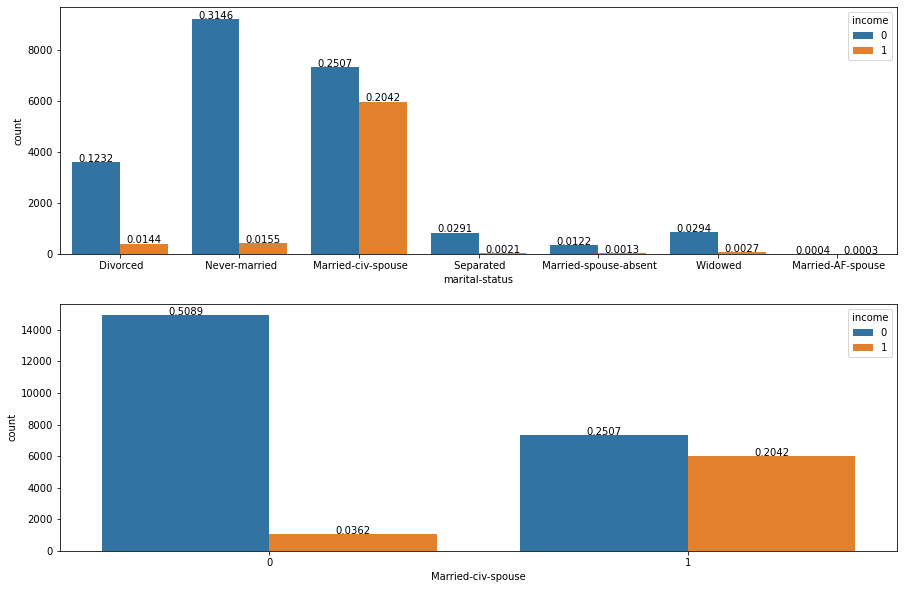

In [502]:
#결혼상태 전처리 전후 그래프
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
ax=sns.countplot(data=train_copy,x="marital-status",hue="income")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.4f}'.format(height/total),
            ha="center") 
plt.subplot(2,1,2)
ax=sns.countplot(data=train,x="Married-civ-spouse",hue="income")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.4f}'.format(height/total),
            ha="center") 

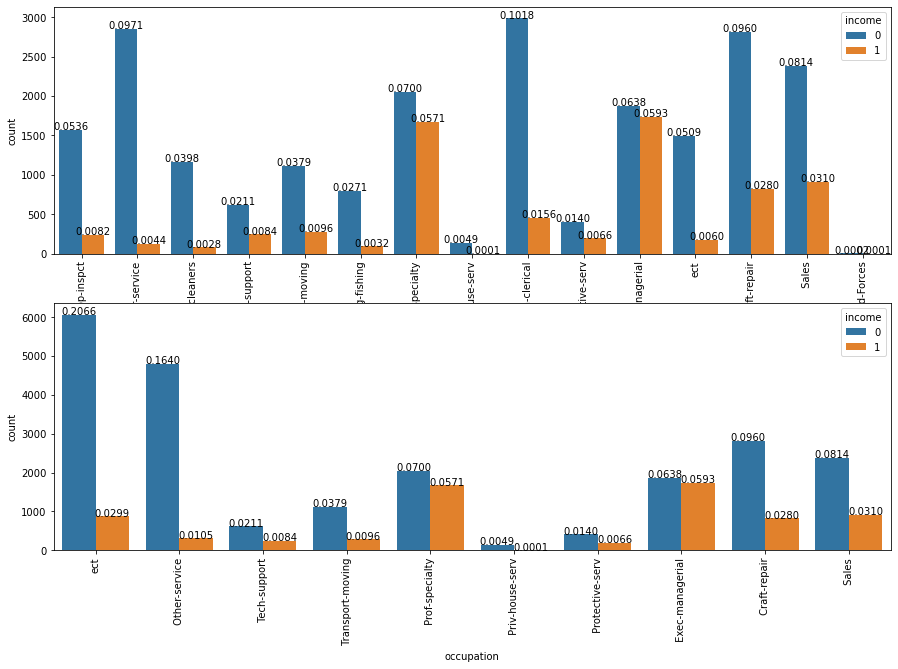

In [105]:
# 직업 전처리 전후 그래프
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
ax=sns.countplot(data=train_copy,x="occupation",hue="income")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.4f}'.format(height/total),
            ha="center")
plt.xticks(rotation=90)
plt.subplot(2,1,2)
plt.xticks(rotation=90)
ax=sns.countplot(data=train,x="occupation",hue="income")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.4f}'.format(height/total),
            ha="center") 

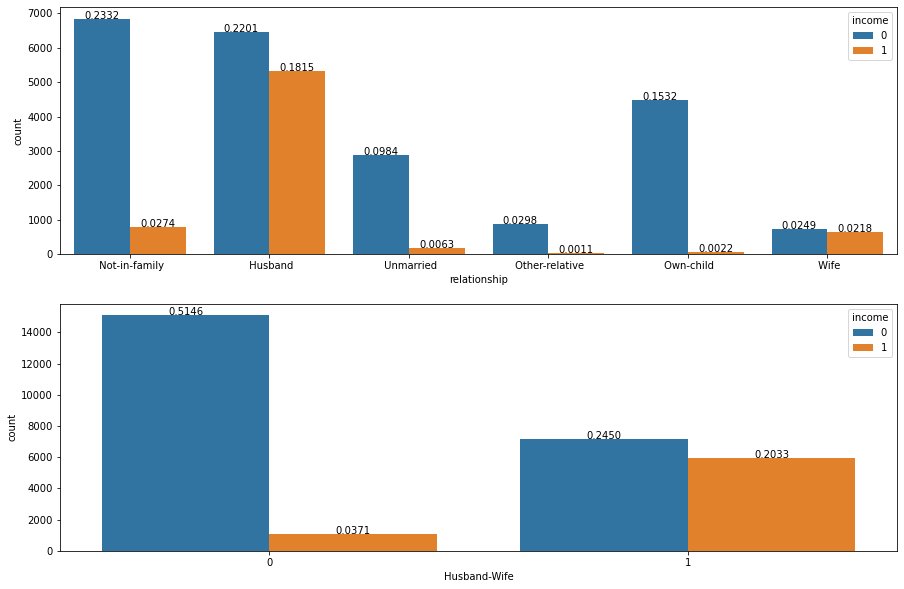

In [106]:
#관계 전처리 전후 그래프
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
ax=sns.countplot(data=train_copy,x="relationship",hue="income")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.4f}'.format(height/total),
            ha="center") 
plt.subplot(2,1,2)
ax=sns.countplot(data=train,x="Husband-Wife",hue="income")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.4f}'.format(height/total),
            ha="center") 

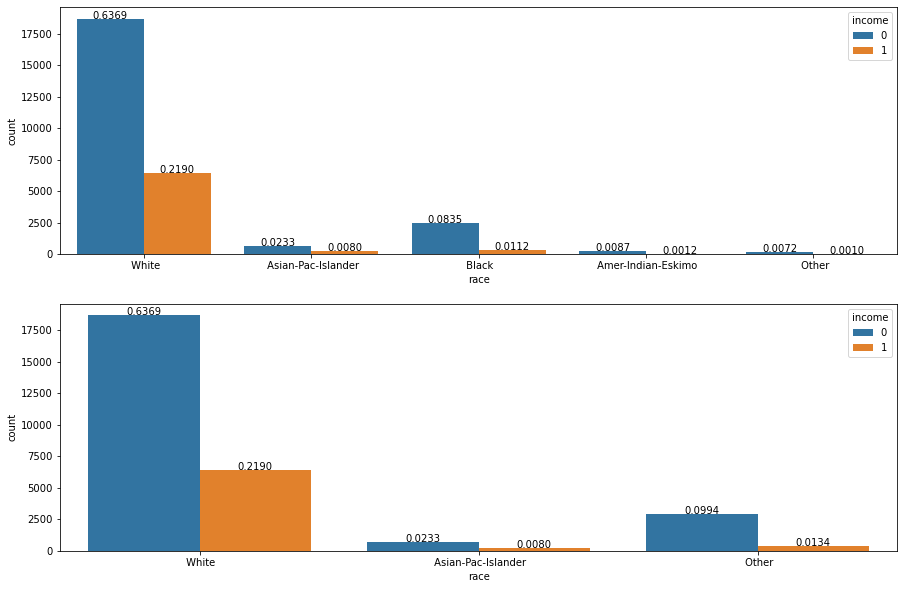

In [107]:
# 인종 전처리 전후 그래프
# 나오지않는 경우 컬럼이 삭제되어 있음
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
ax=sns.countplot(data=train_copy,x="race",hue="income")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.4f}'.format(height/total),
            ha="center") 
plt.subplot(2,1,2)
ax=sns.countplot(data=train,x="race",hue="income")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.4f}'.format(height/total),
            ha="center") 

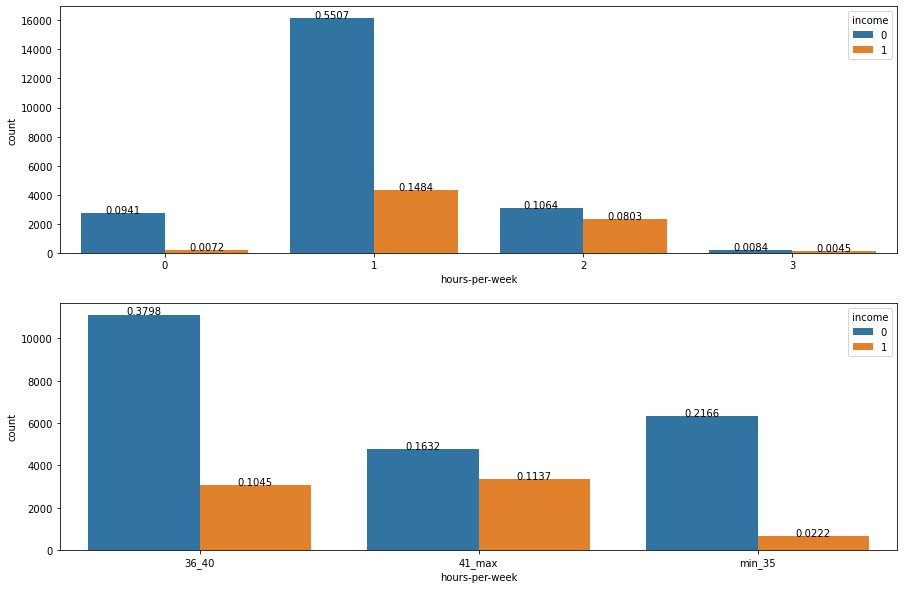

In [108]:
#
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
train_copy["hours-per-week"]=train_copy["hours-per-week"]//5
ax=sns.countplot(data=train_copy,x="hours-per-week",hue="income")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.4f}'.format(height/total),
            ha="center") 
plt.subplot(2,1,2)
ax=sns.countplot(data=train,x="hours-per-week",hue="income")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.4f}'.format(height/total),
            ha="center") 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


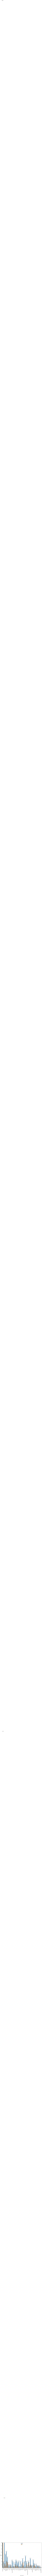

In [499]:
#국적 전처리 전 그래프
plt.figure(figsize=(15,10))
plt.ylim(1,200)
plt.xticks(rotation=90)
ax=sns.countplot(data=train_copy,x="native-country",hue="income")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.4f}'.format(height/total),
            ha="center") 

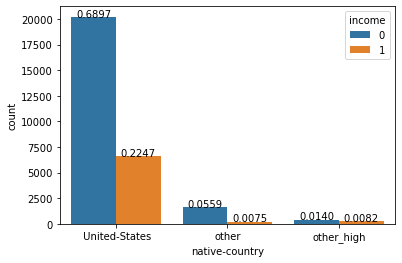

In [109]:
#국적 전처리 후 그래프
# 나오지 않는 경우 컬럼이 삭제되어 있음
ax=sns.countplot(data=train,x="native-country",hue="income")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.4f}'.format(height/total),
            ha="center") 

C:\Users\vdi02\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vdi02\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital-total', ylabel='Density'>

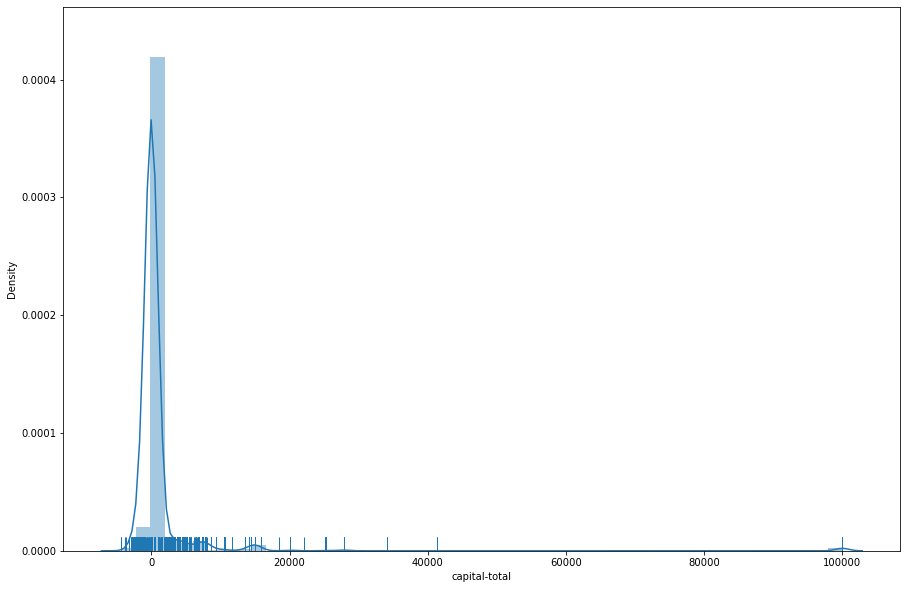

In [123]:
#투자 손익  그래프
plt.figure(figsize=(15,10))
sns.distplot(train["capital-total"] ,rug=True, hist=True, kde=True)

In [127]:
#상관계수
train.corr()

,fnlwgt,sex,income,Married-civ-spouse,Husband-Wife,capital-total,age_30_34&60_max,age_35_44,age_45_59,age_min_29,workclass_ Private,workclass_other_high,workclass_other_low,workclass_other_mid,education_ Assoc,education_ Bachelors,education_ HS-grad,education_ Masters,education_ Prof-Doct,education_ Some-college,education_ pre-12th,education-num_13_18,education-num_1_8,education-num_9_12,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_ect,race_ Asian-Pac-Islander,race_ Other,race_ White,hours-per-week_36_40,hours-per-week_41_max,hours-per-week_min_35,native-country_ United-States,native-country_other,native-country_other_high
fnlwgt,1.000000,-0.016907,0.011228,-0.018805,-0.020590,0.000023,-0.015149,-0.007975,-0.023452,0.043072,0.053401,-0.018535,-0.009069,-0.046378,-0.006909,0.011090,-0.001133,-0.012381,0.000232,-0.013794,0.020034,0.003141,0.020034,-0.016703,0.001431,0.002560,-0.025689,-0.003336,-0.006873,0.017505,0.006408,0.003552,-0.006515,0.017031,-0.034989,0.068200,-0.044059,0.028406,-0.026019,-0.005989,-0.069406,0.078388,0.002155
sex,-0.016907,1.000000,-0.215613,-0.428732,-0.433802,-0.048217,-0.026487,-0.048620,-0.043522,0.110436,0.034776,-0.061701,0.064234,-0.041218,0.022993,-0.025977,-0.012398,-0.012319,-0.056681,0.061248,-0.011493,-0.050762,-0.011493,0.053197,-0.218668,-0.037665,0.023267,0.091448,0.021430,-0.064524,0.012438,0.021927,-0.131715,0.215517,0.005124,0.112341,-0.103719,-0.020975,-0.200651,0.235168,0.006771,0.000599,-0.013845
income,0.011228,-0.215613,1.000000,0.446252,0.449644,0.213463,-0.013722,0.125927,0.197958,-0.290871,-0.074441,0.141981,-0.078277,0.046445,0.011706,0.178918,-0.129584,0.169882,0.204185,-0.061227,-0.166813,0.321973,-0.166813,-0.171042,-0.012879,0.211750,-0.193999,-0.036405,0.186231,0.027584,0.029231,0.017953,-0.019846,-0.148611,0.006446,-0.101364,0.088091,-0.056014,0.246470,-0.193015,0.040575,-0.073950,0.045241
Married-civ-spouse,-0.018805,-0.428732,0.446252,1.000000,0.985435,0.079208,0.076143,0.130899,0.176238,-0.356667,-0.096752,0.092396,-0.059079,0.092511,0.009101,0.052028,0.004430,0.058408,0.083877,-0.084167,-0.047513,0.107844,-0.047513,-0.063092,0.121474,0.105642,-0.130024,-0.048192,0.046136,0.037290,-0.006055,-0.017858,0.082861,-0.130297,0.009153,-0.126246,0.109156,0.002231,0.193642,-0.205842,-0.005105,-0.004371,0.016918
Husband-Wife,-0.020590,-0.433802,0.449644,0.985435,1.000000,0.080362,0.077505,0.134232,0.179301,-0.363902,-0.097284,0.093199,-0.060871,0.093716,0.009910,0.053622,0.002171,0.060775,0.086107,-0.082201,-0.051908,0.111319,-0.051908,-0.063138,0.122561,0.107928,-0.132168,-0.052098,0.048481,0.037044,-0.006080,-0.017767,0.083018,-0.132199,0.000773,-0.126419,0.113471,0.001430,0.197133,-0.208566,0.005130,-0.015216,0.015420
capital-total,0.000023,-0.048217,0.213463,0.079208,0.080362,1.000000,-0.002910,0.022105,0.056081,-0.070458,-0.033972,0.075403,-0.016965,0.003275,-0.017441,0.045979,-0.046794,0.034873,0.179779,-0.036030,-0.040425,0.127497,-0.040425,-0.085519,-0.018195,0.057342,-0.044226,-0.007638,0.082340,-0.004365,0.011544,-0.009302,-0.020604,-0.047112,0.011017,-0.020042,0.012584,-0.043339,0.087741,-0.041286,0.009535,-0.020335,0.015522
age_30_34&60_max,-0.015149,-0.026487,-0.013722,0.076143,0.077505,-0.002910,1.000000,-0.303722,-0.294605,-0.343487,-0.057208,-0.008656,0.068816,0.032059,-0.003471,-0.000613,0.025718,-0.008724,0.017667,-0.052015,0.029171,0.001753,0.029171,-0.021808,-0.001239,-0.002995,-0.014680,0.010653,-0.007203,0.016974,-0.013236,-0.008823,0.008728,0.023578,0.000999,-0.007430,0.006196,-0.023314,-0.008657,0.036413,0.001316,-0.008184,0.011032
age_35_44,-0.007975,-0.048620,0.125927,0.130899,0.134232,0.022105,-0.303722,1.000000,-0.319850,-0.372921,0.004772,0.028812,-0.089263,0.029887,0.041287,0.041427,-0.002989,0.044502,0.026867,-0.028864,-0.081504,0.069344,-0.081504,-0.0

# 모델 점수 확인

-train_test_split run 필 수

In [171]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(train.iloc[:,:-1],train.iloc[:,-1], random_state=42)

In [172]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

- 파라미터별로 그래프 정확도 보기(lightGBM)

In [173]:
train_acc=[] #훈련 정확도
test_acc=[] #테스트 정확도
cv_mean=[] #교차 검증 정확도
neighbor= range(1,10)

for n in neighbor :
    lgbm_model = LGBMClassifier(max_depth=n,learning_rate=0.3,n_estimators=100)
    cv_mean.append(cross_val_score(LGBMClassifier(max_depth=n,learning_rate=0.3,n_estimators=100),X_train1,y_train1,cv=5).mean())
    lgbm_model.fit(X_train1,y_train1)
    train_acc.append(lgbm_model.score(X_train1,y_train1))
    test_acc.append(lgbm_model.score(X_test1,y_test1))
    print(n)

1
2
3
4
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
5
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_lea

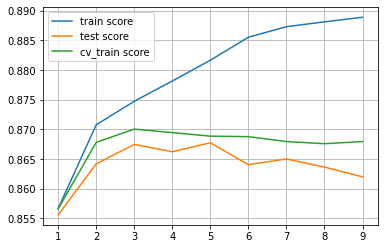

In [174]:
#정확도 그래프
plt.plot(neighbor,train_acc, label="train score")
plt.plot(neighbor,test_acc, label="test score")
plt.plot(neighbor,cv_mean, label="cv_train score")
plt.legend(loc="best")
plt.grid()

- 파라미터별로 그래프 정확도 보기(XGB)

In [182]:

train_acc=[]
test_acc=[]
cv_mean=[]
auc_score=[]
neighbor= range(1,9)

for n in neighbor :
    xgb_model = XGBClassifier(n_estimators= 100 ,max_depth= n,learning_rate=0.1,)
    cv_mean.append(cross_val_score(XGBClassifier(n_estimators= 100 ,max_depth= n,learning_rate=0.1),X_train1,y_train1,cv=5).mean())
    xgb_model.fit(X_train1,y_train1)
    train_acc.append(xgb_model.score(X_train1,y_train1))
    test_acc.append(xgb_model.score(X_test1,y_test1))
    auc_score.append(roc_auc_score(y_test1,xgb_model.predict_proba(X_test1)[:,1]))
    print(n)

C:\Users\vdi02\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:51:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\vdi02\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:51:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\vdi02\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:51:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\vdi02\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:51:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\vdi02\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:52:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\vdi02\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:52:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\vdi02\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:52:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\vdi02\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:52:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:52:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

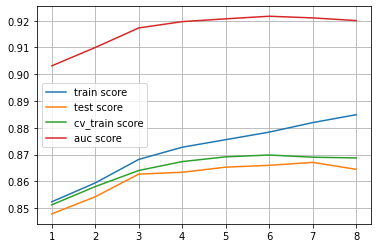

In [183]:
#정확도 그래프
plt.plot(neighbor,train_acc, label="train score")
plt.plot(neighbor,test_acc, label="test score")
plt.plot(neighbor,cv_mean, label="cv_train score")
plt.plot(neighbor,auc_score, label="auc score")
plt.legend(loc="best")
plt.grid()

- 파라미터별로 그래프 정확도 보기(랜덤포레스트)

In [177]:
train_acc=[]
test_acc=[]
cv_mean=[]
neighbor= range(1,10)

for n in neighbor :
    rf_model = RandomForestClassifier(max_depth=n,n_jobs=-1,min_samples_split=10,n_estimators=200)
#     cv_mean.append(cross_val_score(RandomForestClassifier(max_depth=10,min_samples_split=10,n_estimators=200),X_train1,y_train1,cv=5).mean())
    rf_model.fit(X_train1,y_train1)
    train_acc.append(rf_model.score(X_train1,y_train1))
    test_acc.append(rf_model.score(X_test1,y_test1))

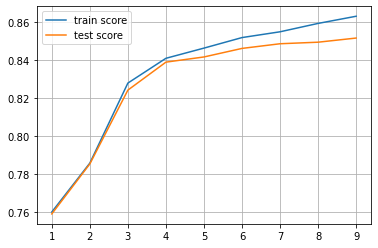

In [178]:
#정확도 그래프
plt.plot(range(1,10),train_acc, label="train score")
plt.plot(range(1,10),test_acc, label="test score")
# plt.plot(range(1,20),cv_mean, label="cv_train score")
plt.legend(loc="best")
plt.grid()

- XGB 모델 적용 및 확인(고정된 파라미터)

In [179]:
xgb_model = XGBClassifier(max_depth= 5)
xgb_model.fit(X_train,y_train)

C:\Users\vdi02\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:50:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [184]:
xgb_pred = xgb_model.predict(X_test)

In [185]:
xgb_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

- lightGBM 모델 적용 및 확인

In [186]:
lgbm_model = LGBMClassifier(max_depth=5)
lgbm_model.fit(X_train,y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


LGBMClassifier(max_depth=5)

In [187]:
lgbm_pred = lgbm_model.predict(X_test)

In [188]:
lgbm_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

- 랜덤포레스트 모델 적용 및 확인

In [189]:
rf_model = RandomForestClassifier(max_depth=10)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [190]:
rf_pred = rf_model.predict(X_test)

- 세가지 모델 voting (제출시 반드시 답안을 정수형으로 바꿔야함, 불완전함으로 사용하지 않는 것을 권함)

In [191]:
total_pred=pd.DataFrame([xgb_pred,lgbm_pred,rf_pred])

In [192]:
total_pred=total_pred.transpose()

In [193]:
total_pred.columns=["xgb","lgbm","rf"]

In [194]:
total_pred["result"]=0

In [195]:
total_pred["result"]=total_pred.sum(axis=1)/3

In [196]:
total_pred["result"]

0        0.000000
1        0.000000
2        1.000000
3        1.000000
4        1.000000
           ...   
19532    0.000000
19533    0.000000
19534    0.666667
19535    0.000000
19536    0.666667
Name: result, Length: 19537, dtype: float64

In [197]:
total_pred["result"]=total_pred["result"].round()

In [198]:
total_pred["result"]=total_pred["result"].astype("int64")

In [2943]:
total_pred

,0,1,2,3,4,5,6,7,8,9,...,19527,19528,19529,19530,19531,19532,19533,19534,19535,19536
0,0,0,1,1,1,0,0,0,1,0,...,1,0,1,0,1,0,0,1,0,0
1,0,0,1,1,1,0,0,0,1,0,...,1,0,1,0,1,0,0,1,0,0
2,0,0,1,1,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0


- 그리드서치 (XGB 사용)

In [553]:
from sklearn.model_selection import KFold, GridSearchCV
#원하시는 파라미터를 넣으시면 됩니다 자세한 파라미터는 인터넷 검색하시면 됩니다.
param_grid={"booster" :["gbtree"],
                 "silent":[True],
                 "max_depth":[5,6,7,8],
                 "gamma":[0,1,2,3],
                 "nthread":[-1],
                 "n_estimators":[25,50,75,100],
                 "objective":["binary:logistic"],
                 "random_state":[2],
                 "learing_rate":[0.1,0.3]}
cv=KFold(n_splits=5, random_state=1)


C:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [555]:
# fit 진행중  ascii 에러가 뜨면 메시지 주시면 됩니다.
GS_XGB.fit(X_train1,y_train1)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:09:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:09:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
       

In [556]:
print('final params', GS_XGB.best_params_)   # 최적의 파라미터 값 출력
print('best score', GS_XGB.best_score_)      # 최고의 점수

final params {'booster': 'gbtree', 'silent': True}
best score 0.8691423374854169


In [557]:
print(GS_XGB.score(X_test1,y_test1))

0.8658386788590146


In [558]:
#테스트데이터에 예측하여 제출
GS_XGB_pred=GS_XGB.best_estimator_.predict(X_test)
GS_XGB_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

- lgbm 그리드서치

In [201]:
from sklearn.model_selection import KFold, GridSearchCV
params = {'max_depth': [4,5,6],
#           'min_child_samples': [20],
          'n_estimators' : [100,150,200],
#           'num_leaves' : [20],
#           'min_split_gain': [0.3, 0.4],
          'learning_rate' : [0.05,0.1,0.2],
          'objective' : ['binary']
         }
cv=KFold(n_splits=5, random_state=1)

C:\Users\vdi02\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [204]:
GS_LGBM = GridSearchCV(LGBMClassifier(n_jobs=-1), param_grid=params,cv=cv,scoring="accuracy")

In [205]:
GS_LGBM.fit(X_train,y_train) 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=False),
             estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [4, 5, 6],
                         'n_estimators': [100, 150, 200],
                         'objective': ['binary']},
             scoring='accuracy')

In [206]:
print('final params', GS_LGBM.best_params_)   # 최적의 파라미터 값 출력
print('best score', GS_LGBM.best_score_)      # 최고의 점수 제기준으로 0.8718이 최고 점수였음

final params {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200, 'objective': 'binary'}
best score 0.8707387817778537


In [207]:
GS_LGBM.score(X_test1,y_test1) # 트레인데이터로 학습된 상태이기 떄문에 최고점수보다 좀 더 잘 나옴

0.8730721987170739

In [208]:
#테스트데이터에 예측하여 제출
grid_score3=GS_LGBM.best_estimator_.predict(X_test)

- 정답 파일 불러오기

In [207]:
csv = pd.read_csv("test17.csv")
csv

,no,income
0,29306,0
1,29307,0
2,29308,1
3,29309,1
4,29310,1
...,...,...
19532,48838,0
19533,48839,0
19534,48840,1
19535,48841,0


- 전에 결과와 비교하기 

In [816]:
(csv["income"]==xgb_pred).value_counts()

True     19227
False      310
Name: income, dtype: int64

In [212]:
(csv["income"]==grid_score3).value_counts()

True     19318
False      219
Name: income, dtype: int64

In [213]:
(csv2["income"]==grid_score3).value_counts()

True     19287
False      250
Name: income, dtype: int64

In [215]:
((csv["income"]==grid_score3)==(csv2["income"]==grid_score3)).value_counts()

True     19398
False      139
Name: income, dtype: int64

In [2980]:
(csv["income"]==total_pred["result"]).value_counts()

True     19123
False      414
dtype: int64

In [2990]:
total_pred["result"].astype("int64")

0        0
1        0
2        1
3        1
4        1
        ..
19532    0
19533    0
19534    1
19535    0
19536    0
Name: result, Length: 19537, dtype: int64

In [217]:
#최종 저장 
csv["income"] = grid_score3
csv.to_csv("test19.csv",index=False) #파일명 변경하는 것이 좋음

# 이 모델로 나왔습니다


In [45]:
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score

In [46]:
lgbm = LGBMClassifier(max_depth=5,n_estimators=100, learning_rate=0.2)

In [47]:
lgbm.fit(X_train,y_train)

LGBMClassifier(learning_rate=0.2, max_depth=5)

In [48]:
result=cross_val_score(lgbm,X_train,y_train)
result

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


array([0.86930558, 0.87544788, 0.86640505, 0.86811124, 0.87271797])

In [49]:
result.mean()

0.8703975430813854